# Exploratory data analaysis for world bank data

## Set export to True if you wish to export graphs and tables


In [9]:
export = False
seed = 1337

from sys import modules
from os import system

IN_COLAB = 'google.colab' in modules
if True:
    system('git clone https://github.com/ICascha/Predicting-food-crises-in-Somalia')
    system('pip install geopandas')
    %cd Predicting-food-crises-in-Somalia/notebooks)


In [10]:
import warnings
from sklearn.cluster import KMeans
from matplotlib.cm import get_cmap
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from auxiliary_code.helper_functions import *

warnings.simplefilter('ignore')
%matplotlib inline


In [12]:
df_phase_fews_net = pd.read_csv(
    '../datasets/fews_net_ipc.csv', parse_dates=['date'])
set_index(df_phase_fews_net)

df_ipc = pd.read_csv('../datasets/ipc_processed.csv',
                     parse_dates=['date'], usecols=['date', 'area', 'area_phase'])
set_index(df_ipc)

df_food_crisis = pd.read_csv(
    '../datasets/world_bank_processed.csv', parse_dates=['date'])
set_index(df_food_crisis)

df_shape = get_shape_file('../geography/Somalia/Som_Admbnda_Adm2_UNDP.shp')


In [13]:
df_sum = df_food_crisis.describe().transpose().iloc[:, 1:].round(3)

if export:
    print(df_sum.to_latex())

df_sum


,mean,std,min,25%,50%,75%,max
centx,45.421,2.498,41.429,43.433,45.333,47.222,50.794
centy,5.591,3.529,-0.854,2.679,4.699,9.230,11.668
fews_ipc,2.309,0.786,1.000,2.000,2.000,3.000,5.000
fews_ha,0.207,0.405,0.000,0.000,0.000,0.000,1.000
fews_proj_near,2.328,0.806,1.000,2.000,2.000,3.000,5.000
fews_proj_near_ha,0.071,0.256,0.000,0.000,0.000,0.000,1.000
fews_proj_med,2.269,0.791,1.000,2.000,2.000,3.000,5.000
fews_proj_med_ha,0.034,0.181,0.000,0.000,0.000,0.000,1.000
ndvi_mean,0.252,0.119,0.084,0.162,0.214,0.313,0.719
ndvi_anom,100.120,13.283,48.244,92.494,98.605,106.457,198.571


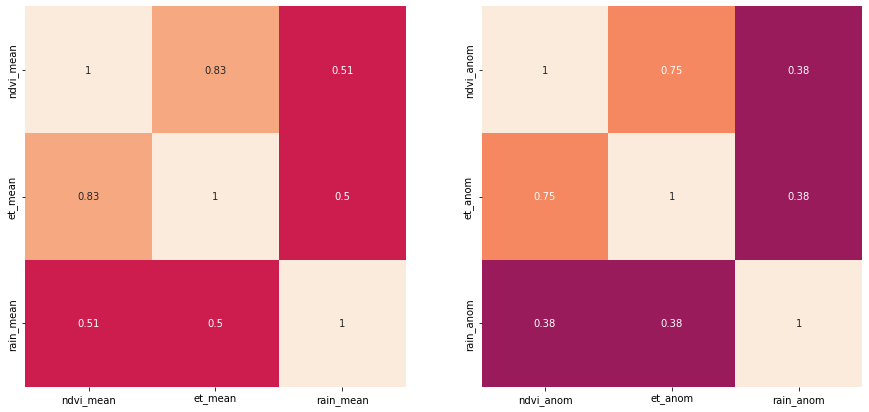

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 7))


sns.heatmap(df_food_crisis[['ndvi_mean', 'et_mean', 'rain_mean']].corr(
), vmin=0, vmax=1, annot=True, ax=ax[0], cbar=False)
sns.heatmap(df_food_crisis[['ndvi_anom', 'et_anom', 'rain_anom']].corr(
), vmin=0, vmax=1, annot=True, ax=ax[1], cbar=False)

if export:
    plt.savefig('../figures/corr_climate.png', dpi=300, bbox_inches='tight')


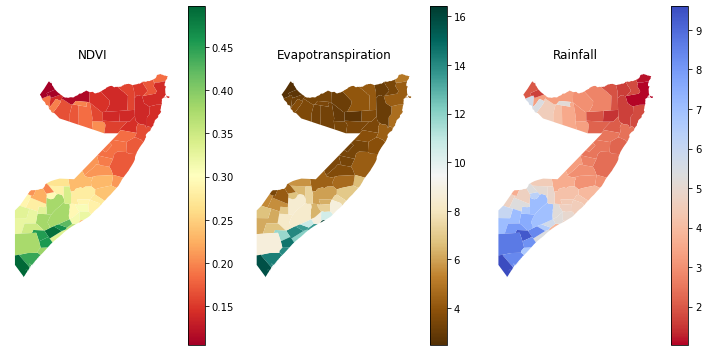

In [15]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 5))

df_mean_rain_area = df_food_crisis.groupby(
    'area')[['ndvi_mean', 'et_mean', 'rain_mean']].mean()
df_plot_phase = df_shape.merge(
    df_mean_rain_area, left_index=True, right_index=True)
df_plot_phase.plot(column='ndvi_mean', cmap='RdYlGn', legend=True, ax=axs[0])
df_plot_phase.plot(column='et_mean', cmap='BrBG', legend=True, ax=axs[1])
df_plot_phase.plot(column='rain_mean', cmap='coolwarm_r',
                   legend=True, ax=axs[2])

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('NDVI')
axs[1].set_title('Evapotranspiration')
axs[2].set_title('Rainfall')


plt.tight_layout()

if export:
    plt.savefig('../Figures/climate_mean_area.png',
                dpi=300, bbox_inches='tight')


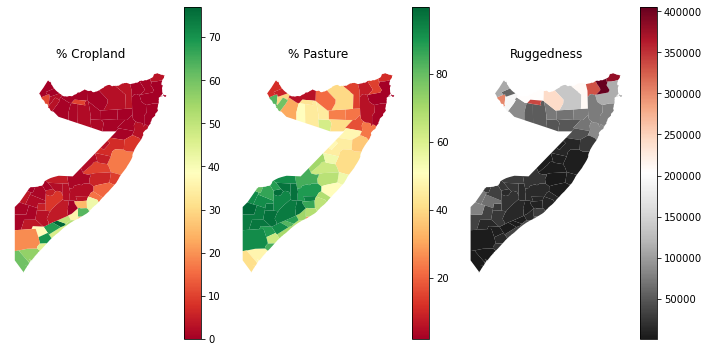

In [16]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 5))

df_mean_rain_area = df_food_crisis.groupby(
    'area')[['cropland_pct', 'pasture_pct', 'ruggedness_mean']].mean()
df_plot_phase = df_shape.merge(
    df_mean_rain_area, left_index=True, right_index=True)
df_plot_phase.plot(column='cropland_pct', cmap='RdYlGn',
                   legend=True, ax=axs[0])
df_plot_phase.plot(column='pasture_pct', cmap='RdYlGn', legend=True, ax=axs[1])
df_plot_phase.plot(column='ruggedness_mean',
                   cmap='RdGy_r', legend=True, ax=axs[2])


axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('% Cropland')
axs[1].set_title('% Pasture')
axs[2].set_title('Ruggedness')


plt.tight_layout()

if export:
    plt.savefig('../figures/agriculture_mean_area.png',
                dpi=300, bbox_inches='tight')


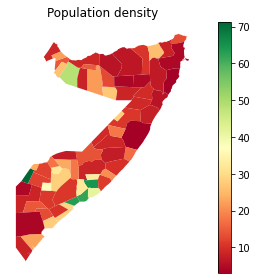

In [17]:
fig, ax = plt.subplots()
df_food_crisis['density'] = df_food_crisis['pop'] / \
    df_food_crisis['surface_area']
df_mean_rain_area = df_food_crisis.groupby('area')[['density']].mean()
mask = df_mean_rain_area < df_mean_rain_area.quantile(.95)

df_plot_phase = df_shape.merge(
    df_mean_rain_area[mask], left_index=True, right_index=True)
df_plot_phase.plot(column='density', cmap='RdYlGn', legend=True, ax=ax)


ax.axis('off')

ax.set_title('Population density')


plt.tight_layout()

if export:
    plt.savefig('../figures/average_density.png', dpi=300, bbox_inches='tight')


In [18]:
df_food_crisis.sort_index(inplace=True)

dates = sorted(get_date(df_food_crisis).unique())
n_dates = len(dates)
areas = get_area(df_food_crisis).unique()
n_areas = len(areas)

values_per_area = []
df_food_crisis['normalized_acled'] = df_food_crisis['acled_count'] / \
    df_food_crisis['pop']
df_food_crisis['normalized_fatalities'] = df_food_crisis['acled_count'] / \
    df_food_crisis['pop']
colnames = ['ndvi_mean', 'et_mean', 'rain_mean',
            'p_staple_food', 'normalized_acled', 'normalized_fatalities']

values_per_area = np.zeros([n_areas, n_dates, len(colnames)])
for i, [_, df] in enumerate(df_food_crisis.groupby('area')):
    values_per_area[i] = df[colnames].to_numpy()


In [19]:
cmap = get_cmap('tab10')


def area_level_clustering(values, cluster_range=range(2, 5)):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

    for n in cluster_range:

        kmeans = KMeans(n_clusters=n, random_state=seed).fit(values)
        clusters = kmeans.predict(values)
        df_cluster = pd.DataFrame({'area': areas, 'cluster': clusters})

        df_plot = df_shape.merge(
            df_cluster, left_index=True, right_index=True)
        df_plot.plot(column='cluster', cmap='tab10',
                     ax=ax[n-2, 0], scheme='User_Defined', classification_kwds=dict(bins=range(9)))

        l = []
        for i in range(n):
            ax[n-2, 1].plot(dates, values[clusters == i].T,
                            alpha=0.2, c=cmap(i))
            ax[n-2, 2].plot(dates, values[clusters ==
                            i].T.mean(axis=1), c=cmap(i))

        ax[n-3, 0].axis('off')

    ax[0, 0].set_title('clusters', size=20)
    ax[0, 1].set_title('discrict-level trends', size=20)
    ax[0, 2].set_title('cluster-level trends', size=20)

    return fig


posx and posy should be finite values
posx and posy should be finite values


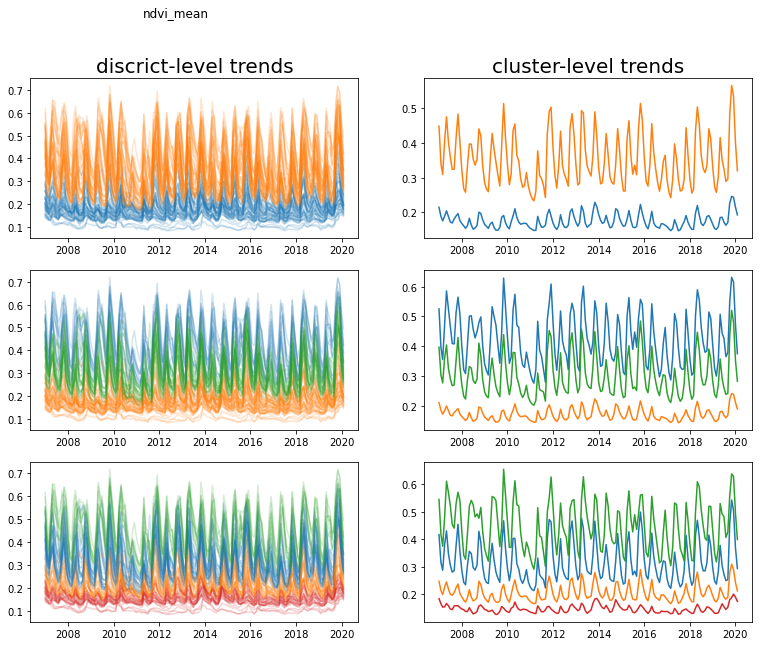

posx and posy should be finite values
posx and posy should be finite values


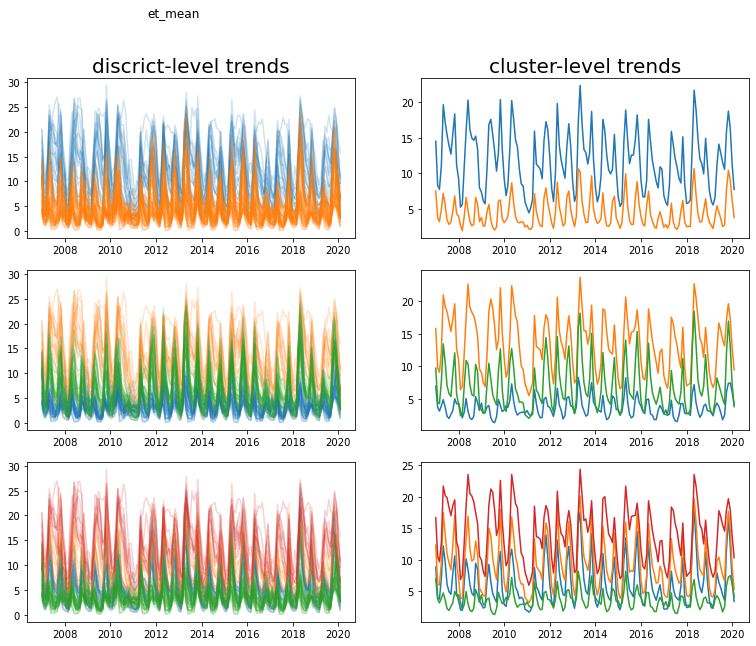

posx and posy should be finite values
posx and posy should be finite values


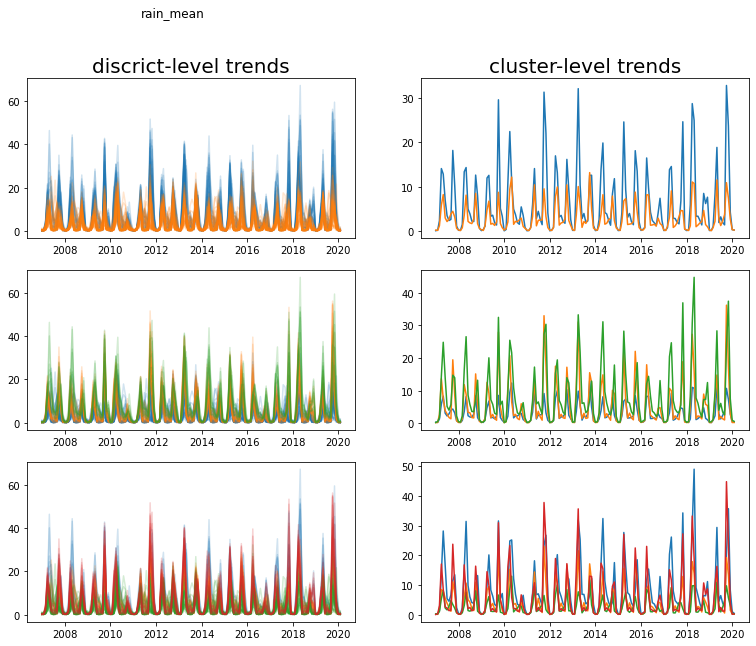

posx and posy should be finite values
posx and posy should be finite values


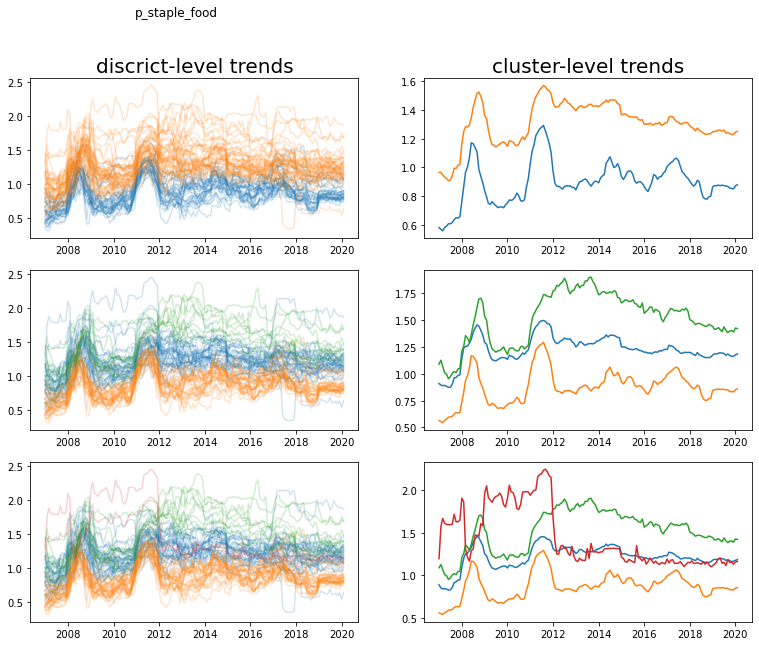

posx and posy should be finite values
posx and posy should be finite values


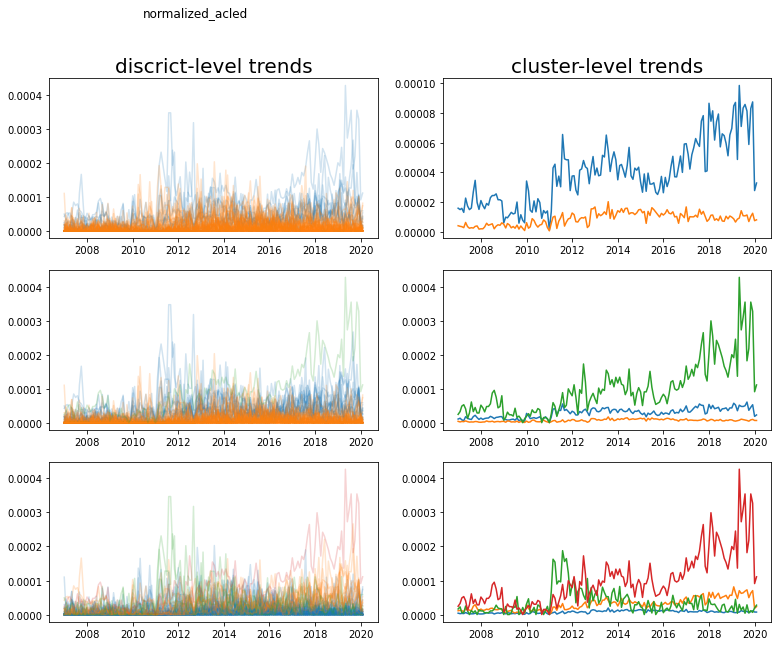

posx and posy should be finite values
posx and posy should be finite values


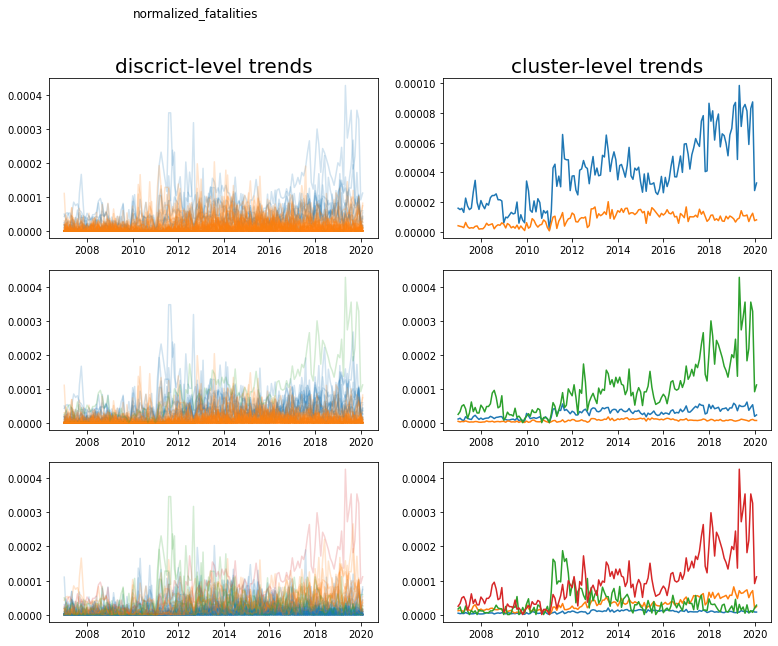

In [20]:
figs = []

for i, colname in enumerate(colnames):
    fig = area_level_clustering(values_per_area[..., i])
    fig.suptitle(colname)
    figs.append(fig)


In [21]:
if export:
    for i, fig in enumerate(figs):
        fig.suptitle('')
        fig.savefig('../figures/clustering_' + colnames[i])
